In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

print ('-This section done-')

#import sys
#sys.path.append("/Users/omerorhan/Desktop/UCSC/Deep Learning/DeepLearningUCSC/venv/homework/Assignments/") 


/anaconda3/envs/tf-cpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


-This section done-


In [2]:
import weather

ImportError: No module named 'weather'

In [3]:
weather.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [4]:
cities = weather.cities
print(cities)

['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']


In [5]:
%%time
df = weather.load_resampled_data()

CPU times: user 42.3 s, sys: 3.45 s, total: 45.8 s
Wall time: 46 s


In [7]:
df.head()

Aalborg                                    Aarhus  \
                         Temp     Pressure WindSpeed     WindDir   Temp   
DateTime                                                                  
1980-03-01 11:00:00  5.000000  1007.766667      10.2  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000      10.3  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667       9.7  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333      11.1  283.333333    5.0   
1980-03-01 15:00:00  4.000000  1008.200000      11.3  280.000000    5.0   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556      NaN   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   
1980-03-01 15:00:00  12.577778  302.777778  6.000000  1011.500000  12.400000   

                             Roskilde                                  
                    WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                               
1980-03-01 11:00:00   290.0  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00   290.0  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00   290.0  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00   290.0  5.833333      NaN  12.300000  270.000000  
1980-03-01 15:00:00   290.0  4.833333      NaN  12.300000  270.000000

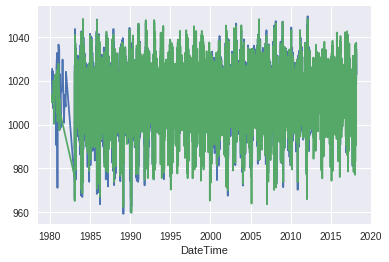

In [8]:
# To Take care of Missing Data:::
df['Esbjerg']['Pressure'].plot()
df['Roskilde']['Pressure'].plot()

In [9]:
df.values.shape

(333109, 20)

In [0]:
df.drop(('Esbjerg', 'Pressure'), axis=1, inplace=True)
df.drop(('Roskilde', 'Pressure'), axis=1, inplace=True)

In [11]:
df.values.shape

(333109, 18)

In [12]:
df.head(1)

Aalborg                                Aarhus           \
                       Temp     Pressure WindSpeed WindDir   Temp Pressure   
DateTime                                                                     
1980-03-01 11:00:00     5.0  1007.766667      10.2   280.0    5.0   1008.3   

                                        Esbjerg                       Odense  \
                    WindSpeed WindDir      Temp  WindSpeed WindDir      Temp   
DateTime                                                                       
1980-03-01 11:00:00      15.4   290.0  6.083333  12.383333   310.0  6.142857   

                                                    Roskilde             \
                        Pressure  WindSpeed WindDir     Temp  WindSpeed   
DateTime                                                                  
1980-03-01 11:00:00  1011.066667  12.585714   290.0      5.0  11.466667   

                             
                    WindDir  
DateTime                     
1980-03-01 11:00:00   280.0

In [0]:
df['Various', 'Day'] = df.index.dayofyear
df['Various', 'Hour'] = df.index.hour

In [14]:
# Predict for city Odense: ['Temp', 'WindSpeed', 'Pressure'] 
target_city = 'Odense'
target_names = ['Temp', 'WindSpeed', 'Pressure']
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.
df_targets = df[target_city][target_names].shift(-shift_steps)
df[target_city][target_names].head(shift_steps + 5)

,Temp,WindSpeed,Pressure
DateTime,,,
1980-03-01 11:00:00,6.142857,12.585714,1011.066667
1980-03-01 12:00:00,7.000000,11.300000,1011.200000
1980-03-01 13:00:00,7.000000,12.118182,1011.300000
1980-03-01 14:00:00,6.857143,12.742857,1011.400000
1980-03-01 15:00:00,6.000000,12.400000,1011.500000
1980-03-01 16:00:00,4.909091,12.618182,1011.688889
1980-03-01 17:00:00,3.953488,12.646512,1011.877778
1980-03-01 18:00:00,3.674419,11.725581,1012.066667
1980-03-01 19:00:00,3.395349,10.804651,1012.255556


In [15]:
df_targets.head(5)

,Temp,WindSpeed,Pressure
DateTime,,,
1980-03-01 11:00:00,2.000000,6.828571,1005.833333
1980-03-01 12:00:00,2.000000,8.200000,1005.200000
1980-03-01 13:00:00,0.166667,9.216667,1004.766667
1980-03-01 14:00:00,1.000000,11.885714,1004.333333
1980-03-01 15:00:00,1.000000,12.400000,1003.900000


In [16]:
# Converting Data Frames to Numpy array::::

x_data = df.values[0:-shift_steps]
print("X_Shape::::")
print(type(x_data))
print("Shape:", x_data.shape)

print("Y_Shape::::")
y_data = df_targets.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

num_data = len(x_data)
print("# of input data ",num_data)

train_split = 0.9

num_train = int(train_split * num_data)
print("# of Training data: ",num_train)

num_test = num_data - num_train
print("# of Test data: ",num_test)

x_train = x_data[0:num_train]
x_test = x_data[num_train:]

y_train = y_data[0:num_train]
y_test = y_data[num_train:]

num_x_signals = x_data.shape[1]

num_y_signals = y_data.shape[1]

print(num_x_signals)
print(num_y_signals)


X_Shape::::
<class 'numpy.ndarray'>
Shape: (333085, 20)
Y_Shape::::
<class 'numpy.ndarray'>
Shape: (333085, 3)
# of input data  333085
# of Training data:  299776
# of Test data:  33309
20
3


In [17]:
# Scaling data

#The neural network works best on values roughly between -1 and 1, so we need to scale the data before it is being input to the neural network. We can use scikit-learn for this.

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))
x_test_scaled = x_scaler.transform(x_test)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(x_train_scaled[0:4,])





Min: 0.0
Max: 1.0000000000000002
[[0.53763441 0.56488035 0.3100304  0.77142857 0.5307971  0.55873016
  0.46107784 0.8        0.40843621 0.31670929 0.85714286 0.39561957
  0.57585949 0.20130123 0.8        0.49845201 0.45866667 0.77142857
  0.16438356 0.47826087]
 [0.53763441 0.56723964 0.31306991 0.8        0.5307971  0.56190476
  0.4011976  0.77142857 0.41460905 0.32949702 0.85714286 0.40745856
  0.57735426 0.18073697 0.8        0.49845201 0.49866667 0.77142857
  0.16438356 0.52173913]
 [0.53763441 0.56791372 0.29483283 0.8        0.5307971  0.56014109
  0.46107784 0.77142857 0.41838134 0.33873259 0.85555556 0.40745856
  0.57847534 0.19382332 0.8        0.50154799 0.52533333 0.76666667
  0.16438356 0.56521739]
 [0.52568698 0.5685878  0.33738602 0.78095238 0.5307971  0.55837743
  0.44610778 0.82857143 0.41015089 0.33020745 0.84603175 0.4054854
  0.57959641 0.20381464 0.8        0.51393189 0.492      0.74285714
  0.16438356 0.60869565]]


In [0]:
print(np.shape(x_train))
#print(x_train[0:3,:])
tr_scaled = np.zeros(np.shape(x_train))
for i in range(0,20):
  tr_mean = np.mean(x_train[:,i])
  tr_sd = np.std(x_train[:,i])
  tr_scaled[:,i] = (x_train[:,i] - tr_mean)/ tr_sd
print(tr_scaled[0:4])

(299776, 20)
[[-0.44936436 -0.42001645  1.90969353  0.99510771 -0.44563301 -0.43734634
   4.39823774  1.07168148 -0.34625704  2.77328491  1.22183406 -0.37028186
  -0.24149001  2.76945205  1.11632061 -0.44183742  2.38304315  0.89245276
  -1.1545607  -0.07225043]
 [-0.44936436 -0.40014786  1.94555902  1.10833011 -0.44563301 -0.41087075
   3.62104988  0.95028072 -0.27253896  2.95938096  1.22183406 -0.24726863
  -0.2293943   2.30759351  1.11632061 -0.44183742  2.7439533   0.89245276
  -1.1545607   0.07221188]
 [-0.44936436 -0.39447112  1.73036607  1.10833011 -0.44563301 -0.42557941
   4.39823774  0.95028072 -0.22748902  3.09378367  1.21553133 -0.24726863
  -0.22032252  2.60150349  1.11632061 -0.4185853   2.98456006  0.87311934
  -1.1545607   0.21667419]
 [-0.54429809 -0.38879438  2.23248296  1.03284851 -0.44563301 -0.44028807
   4.20394077  1.19308224 -0.32577979  2.96971963  1.17771496 -0.26777083
  -0.21125073  2.82590143  1.11632061 -0.32557684  2.6838016   0.77645227
  -1.1545607   0.3

In [18]:
#Data Generator
print(x_train_scaled.shape)
print(y_train_scaled.shape)



(299776, 20)
(299776, 3)


In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))
print(x_test_scaled.shape)

(33309, 20)


In [0]:
lookback = 2352 # was 1440. 24 hours per day into 14 days = 168*14 = 2352
step = 6 # Original was 6
delay = 144 # We will predict 1 days in future. hence 24*6 = 144
batch_size = 128
#data—The original array of floating-point data
#lookback—How many timesteps back the input data should go.
#delay—How many timesteps in the future the target should be.
#min_index and max_index—Indices in the data array that delimit which time-
#steps to draw from. This is useful for keeping a segment of the data for valida-
#tion and another for testing.
#shuffle—Whether to shuffle the samples or draw them in chronological order.
#batch_size—The number of samples per batch.
#step—The period, in timesteps, at which you sample data. set it to 1 in
#order to draw one data point every hour.
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1])) # Size = Batchsize,lookback,20
        targets = np.zeros((len(rows),)) #Size typically Batchsize
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        #print(np.shape(samples))
        #print(np.shape(targets))
        yield samples, targets

        
train_gen = generator(x_train_scaled,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=20000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(x_train_scaled,
                    lookback=lookback,
                    delay=delay,
                    min_index=20001,
                    max_index=30000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(x_train_scaled,
                     lookback=lookback,
                     delay=delay,
                     min_index=30001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


val_steps = (30000 - 20001 - lookback)

test_steps = (len(x_test_scaled) - 30001 - lookback)


In [20]:
from keras.models import Sequential 
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, x_train_scaled.shape[-1]))) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae') 
history = model.fit_generator(train_gen,
steps_per_epoch=500, epochs=4, validation_data=val_gen, validation_steps=val_steps)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Epoch 1/4
500/500 [==============================] - 124s 249ms/step - loss: 0.1741 - val_loss: 0.0726
Epoch 2/4
500/500 [==============================] - 123s 245ms/step - loss: 0.0667 - val_loss: 0.0566
Epoch 3/4
500/500 [==============================] - 120s 240ms/step - loss: 0.0630 - val_loss: 0.0518
Epoch 4/4
500/500 [==============================] - 119s 237ms/step - loss: 0.0602 - val_loss: 0.0455


In [23]:
dropout = 0.2
from keras.layers import LSTM
model = Sequential()
# We will be adding LSTM cell from Keras.
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lookback// step, x_train_scaled.shape[-1]), stateful=True, dropout=dropout))
#model.add(Dense(1))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_gen,
steps_per_epoch=500, epochs=5, validation_data=val_gen, validation_steps=val_steps)
# make predictions
#trainPredict = model.predict(train_gen, batch_size=batch_size)
#model.reset_states()


Epoch 1/5
499/500 [============================>.] - ETA: 0s - loss: 0.0360

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()